In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\Bhawna\Downloads\Balaji Fast Food Sales.csv")
df.head()

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,07-03-2022,Aalopuri,Fastfood,20,13,260,NaN,Mr.,Night
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            1000 non-null   int64 
 1   date                1000 non-null   object
 2   item_name           1000 non-null   object
 3   item_type           1000 non-null   object
 4   item_price          1000 non-null   int64 
 5   quantity            1000 non-null   int64 
 6   transaction_amount  1000 non-null   int64 
 7   transaction_type    893 non-null    object
 8   received_by         1000 non-null   object
 9   time_of_sale        1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


In [3]:
df['date_clean'] = pd.to_datetime(df['date'].str.replace('-','/'), dayfirst = True, errors = 'coerce').fillna(pd.to_datetime(df['date'].str.replace('-','/'), dayfirst = False, errors = 'coerce'))

In [8]:
df.head()

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale,date_clean
0,1,07-03-2022,Aalopuri,Fastfood,20,13,260,NaN,Mr.,Night,2022-03-07
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon,2022-08-23
2,3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon,2022-11-20
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night,2023-03-02
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening,2022-02-10


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            1000 non-null   int64         
 1   date                1000 non-null   object        
 2   item_name           1000 non-null   object        
 3   item_type           1000 non-null   object        
 4   item_price          1000 non-null   int64         
 5   quantity            1000 non-null   int64         
 6   transaction_amount  1000 non-null   int64         
 7   transaction_type    893 non-null    object        
 8   received_by         1000 non-null   object        
 9   time_of_sale        1000 non-null   object        
 10  date_clean          1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(6)
memory usage: 86.1+ KB


In [10]:
df['transaction_type'].unique()

array([nan, 'Cash', 'Online'], dtype=object)

In [4]:
df['transaction_type'] = df['transaction_type'].fillna('No Mode')

In [12]:
df.isnull().sum()

order_id              0
date                  0
item_name             0
item_type             0
item_price            0
quantity              0
transaction_amount    0
transaction_type      0
received_by           0
time_of_sale          0
date_clean            0
dtype: int64

In [5]:
df.drop(['date'], inplace = True, axis = 1)

In [15]:
df.head()

,order_id,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale,date_clean
0,1,Aalopuri,Fastfood,20,13,260,No Mode,Mr.,Night,2022-03-07
1,2,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon,2022-08-23
2,3,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon,2022-11-20
3,4,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night,2023-03-02
4,5,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening,2022-02-10


In [16]:
df.tail()

,order_id,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale,date_clean
995,996,Frankie,Fastfood,50,10,500,No Mode,Mrs.,Evening,2023-03-19
996,997,Sandwich,Fastfood,60,7,420,No Mode,Mr.,Evening,2022-09-20
997,998,Sandwich,Fastfood,60,13,780,No Mode,Mr.,Evening,2023-01-26
998,999,Panipuri,Fastfood,20,5,100,No Mode,Mrs.,Afternoon,2022-08-27
999,1000,Aalopuri,Fastfood,20,3,60,Online,Mrs.,Midnight,2022-05-29


In [21]:
df['item_name'].unique()

array(['Aalopuri', 'Vadapav', 'Sugarcane juice', 'Panipuri', 'Frankie',
       'Sandwich', 'Cold coffee'], dtype=object)

In [24]:
df.groupby(['item_name'])['order_id'].count()

item_name
Aalopuri           134
Cold coffee        161
Frankie            139
Panipuri           150
Sandwich           129
Sugarcane juice    153
Vadapav            134
Name: order_id, dtype: int64

In [27]:
df.groupby(['item_name'])['quantity'].sum()

item_name
Aalopuri           1044
Cold coffee        1361
Frankie            1150
Panipuri           1226
Sandwich           1097
Sugarcane juice    1278
Vadapav            1006
Name: quantity, dtype: int64

In [30]:
df.groupby(['item_name'])['transaction_amount'].max()

item_name
Aalopuri           300
Cold coffee        600
Frankie            750
Panipuri           300
Sandwich           900
Sugarcane juice    375
Vadapav            300
Name: transaction_amount, dtype: int64

In [31]:
df.groupby(['transaction_type'])['order_id'].count()

transaction_type
Cash       476
No Mode    107
Online     417
Name: order_id, dtype: int64

In [32]:
df.groupby(['time_of_sale'])['order_id'].count()

time_of_sale
Afternoon    205
Evening      201
Midnight     199
Morning      190
Night        205
Name: order_id, dtype: int64

In [33]:
df.groupby(['item_type'])['transaction_amount'].sum()


item_type
Beverages     86390
Fastfood     188840
Name: transaction_amount, dtype: int64

In [35]:
df.groupby(['received_by'])['order_id'].count()


received_by
Mr.     512
Mrs.    488
Name: order_id, dtype: int64

In [40]:
daily_sum = df.groupby(['date_clean'])['transaction_amount'].sum()

In [42]:
max_sale_day = daily_sum.idxmax()
max_value = daily_sum.max()
print(max_sale_day, max_value)

2023-03-19 00:00:00 3350


In [43]:
df.groupby(['item_name'])['quantity'].mean()

item_name
Aalopuri           7.791045
Cold coffee        8.453416
Frankie            8.273381
Panipuri           8.173333
Sandwich           8.503876
Sugarcane juice    8.352941
Vadapav            7.507463
Name: quantity, dtype: float64

In [46]:
summary = df.groupby(['item_type']).agg(
    total_quantity = ('quantity', 'sum'),
    total_revenue = ('transaction_amount', 'sum')
)
print(summary)

           total_quantity  total_revenue
item_type                               
Beverages            2639          86390
Fastfood             5523         188840


In [51]:
df.groupby('time_of_sale')['item_name'].max()

time_of_sale
Afternoon    Vadapav
Evening      Vadapav
Midnight     Vadapav
Morning      Vadapav
Night        Vadapav
Name: item_name, dtype: object

In [57]:
df.groupby(['time_of_sale', 'item_name']).size().reset_index(name = 'count')\
.sort_values(['time_of_sale', 'count'], ascending = [True,False])\
.drop_duplicates('time_of_sale')

,time_of_sale,item_name,count
5,Afternoon,Sugarcane juice,41
10,Evening,Panipuri,36
14,Midnight,Aalopuri,33
22,Morning,Cold coffee,32
29,Night,Cold coffee,39


<Axes: xlabel='transaction_type', ylabel='count'>

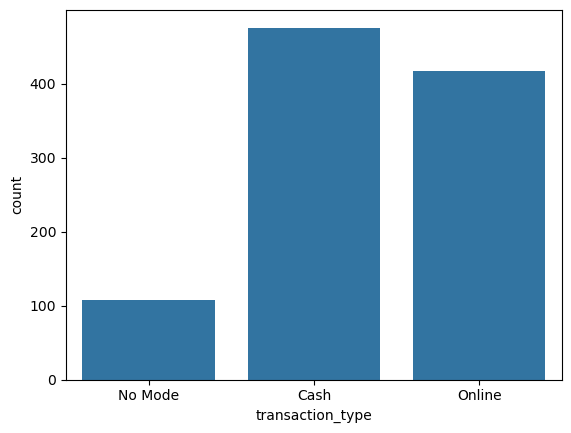

In [59]:
sns.countplot(x='transaction_type', data=df)

In [6]:
df['month'] = df['date_clean'].dt.to_period('M')

In [14]:
df.head()

,order_id,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale,date_clean,month
0,1,Aalopuri,Fastfood,20,13,260,No Mode,Mr.,Night,2022-03-07,2022-03
1,2,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon,2022-08-23,2022-08
2,3,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon,2022-11-20,2022-11
3,4,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night,2023-03-02,2023-03
4,5,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening,2022-02-10,2022-02


In [15]:
monthly_sales = (df.groupby(['item_name','month'])['transaction_amount'].sum().reset_index())

In [16]:
print(monthly_sales)

    item_name    month  transaction_amount
0    Aalopuri  2022-01                 680
1    Aalopuri  2022-02                  20
2    Aalopuri  2022-03                 520
3    Aalopuri  2022-04                1180
4    Aalopuri  2022-05                2080
..        ...      ...                 ...
148   Vadapav  2023-06                 300
149   Vadapav  2023-08                 240
150   Vadapav  2023-09                 300
151   Vadapav  2023-10                 320
152   Vadapav  2023-11                 140

[153 rows x 3 columns]


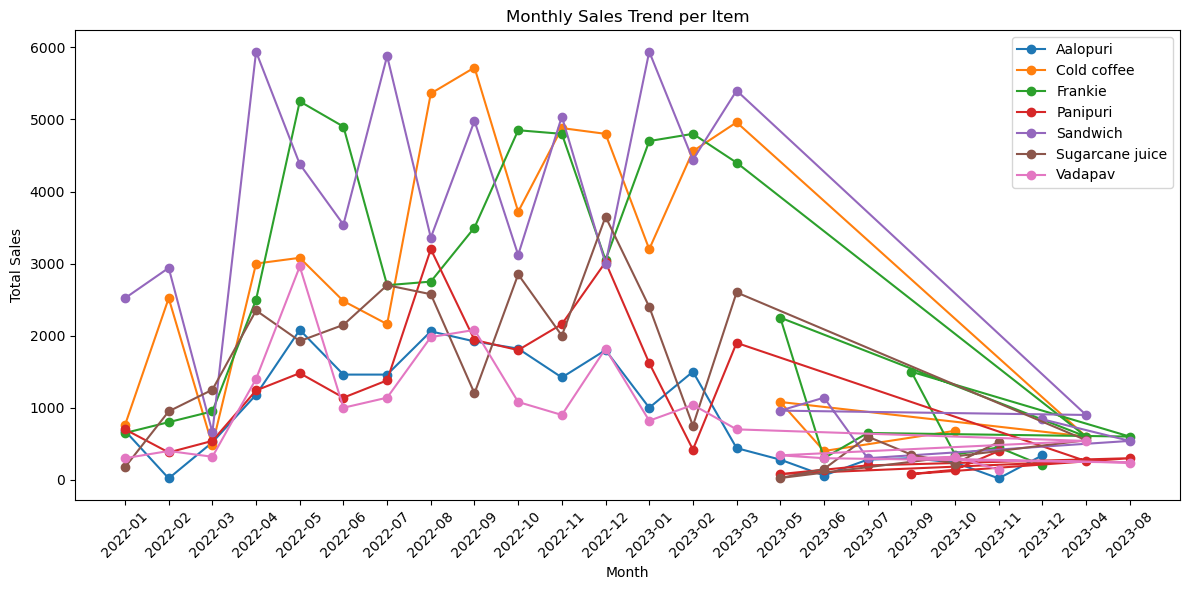

In [26]:
plt.figure(figsize=(12,6))

for item in monthly_sales['item_name'].unique():
    item_data = monthly_sales[monthly_sales['item_name'] == item]
    plt.plot(
        item_data['month'].astype(str),
        item_data['transaction_amount'],
        marker ='o',
        label = item
    )
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Trend per Item')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [30]:
df.groupby(['item_type','time_of_sale'])['order_id'].count()

item_type  time_of_sale
Beverages  Afternoon        75
           Evening          62
           Midnight         54
           Morning          57
           Night            66
Fastfood   Afternoon       130
           Evening         139
           Midnight        145
           Morning         133
           Night           139
Name: order_id, dtype: int64

In [31]:
df[df['time_of_sale'] =='Night'].groupby(['item_type'])['order_id'].count()

item_type
Beverages     66
Fastfood     139
Name: order_id, dtype: int64

In [32]:
df.groupby(['received_by','time_of_sale'])['order_id'].count()


received_by  time_of_sale
Mr.          Afternoon       113
             Evening         105
             Midnight         85
             Morning         100
             Night           109
Mrs.         Afternoon        92
             Evening          96
             Midnight        114
             Morning          90
             Night            96
Name: order_id, dtype: int64

In [37]:
panipuri_data = df[df['item_name'] == 'Panipuri']

In [48]:
monthly_panipuri_sales = panipuri_data.groupby(['month'])['transaction_amount'].sum().reset_index()

print(monthly_panipuri_sales)

      month  transaction_amount
0   2022-01                 700
1   2022-02                 380
2   2022-03                 540
3   2022-04                1240
4   2022-05                1480
5   2022-06                1140
6   2022-07                1380
7   2022-08                3200
8   2022-09                1940
9   2022-10                1800
10  2022-11                2160
11  2022-12                3020
12  2023-01                1620
13  2023-02                 420
14  2023-03                1900
15  2023-04                 260
16  2023-05                  80
17  2023-06                 140
18  2023-07                 200
19  2023-08                 300
20  2023-09                  80
21  2023-10                 140
22  2023-11                 400


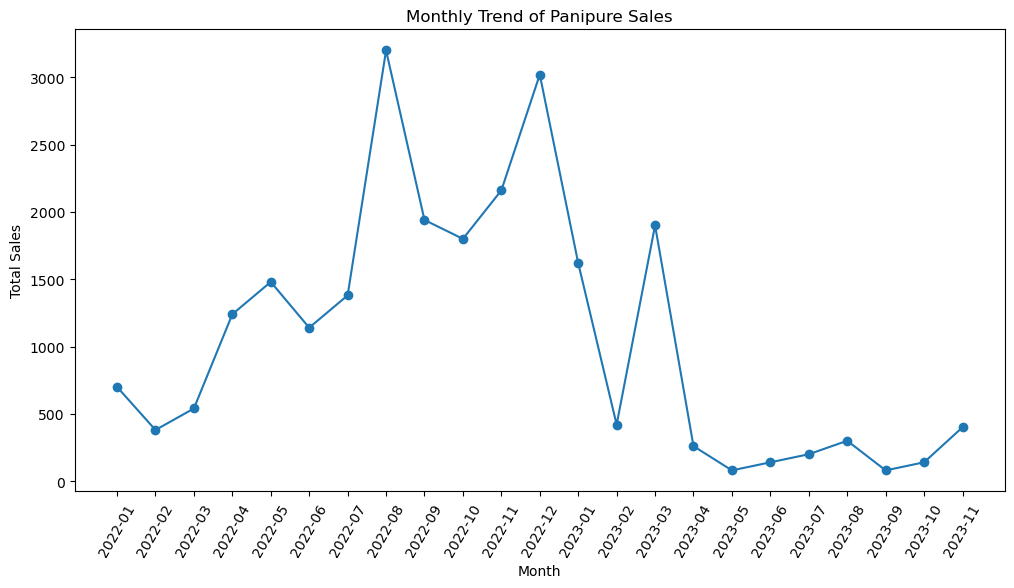

In [49]:
plt.figure(figsize = (12,6))
plt.plot(
    monthly_panipuri_sales['month'].astype(str),
    monthly_panipuri_sales['transaction_amount'],
    marker = 'o'
)
plt.title('Monthly Trend of Panipure Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=60)
plt.show()


In [50]:
df[df['item_name'] == 'Cold coffee'].groupby('month')['transaction_amount'].sum()

month
2022-01     760
2022-02    2520
2022-03     480
2022-04    3000
2022-05    3080
2022-06    2480
2022-07    2160
2022-08    5360
2022-09    5720
2022-10    3720
2022-11    4880
2022-12    4800
2023-01    3200
2023-02    4560
2023-03    4960
2023-04     600
2023-05    1080
2023-06     400
2023-10     680
Freq: M, Name: transaction_amount, dtype: int64

In [8]:
distribution = df.groupby(['received_by', 'item_type']).size().reset_index(name='count')

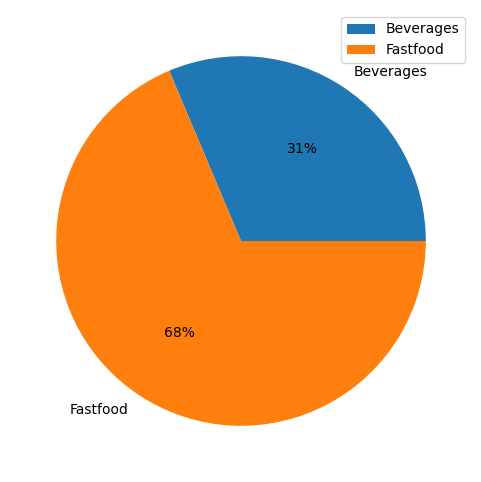

In [14]:
for i in distribution['received_by'].unique():
    pie_data = distribution[distribution['received_by'] == i]
plt.figure(figsize=(6,6))
plt.pie(pie_data['count'], labels= pie_data['item_type'], autopct = '%d%%')      
plt.legend()
plt.show()

In [15]:
# Null hypothesis: Cash and online transaction's average transaction amount are same.
# Alternate hypothesis: Cash and online transaction's average transaction amount are different.

cash_data = df[df['transaction_type']=='Cash']['transaction_amount']
online_data = df[df['transaction_type']=='Online']['transaction_amount']

In [6]:
from scipy import stats

In [19]:
print(cash_data.var())
print(online_data.var())     # if variance same then equal var = True but here it is different.

42091.14374170718
39726.63599889316


In [21]:
t_stat, p_value = stats.ttest_ind(cash_data, online_data, equal_var=False)  #when variance different, then it is called Welch's t-test.
print(f'T-statistics: {t_stat}')
print(f'P-value: {p_value}')

#We accept the null hypothesis.

T-statistics: 1.0226075527347571
P-value: 0.30677398141144335


In [26]:
# Null hypothesis: Order quantity are same for Mr. and Mrs.
# Alternate hypothesis: Order quantity are different for Mr. and Mrs.
mr_data = df[df['received_by'] == 'Mr.']['quantity']
mrs_data = df[df['received_by'] == 'Mrs.']['quantity']

In [27]:
t_stat, p_value = stats.ttest_ind(mr_data, mrs_data, equal_var=False)
print(t_stat)
print(p_value)

# We accept the Null hypothesis

1.2784442529829272
0.20139006103644677


In [7]:
#Null hypothesis: There is no difference between the price of fastfood and beverages.
#Alternate hypothesis: There is difference between the average price of fastfood and beverages.
fastfood_data = df[df['item_type'] == 'Fastfood']['transaction_amount']
beverages_data = df[df['item_type'] == 'Beverages']['transaction_amount']

In [8]:
t_stat, p_value = stats.ttest_ind(fastfood_data, beverages_data, equal_var = False)
print(f'T-statistics: {t_stat}')
print(f'P-value: {p_value}')
# We accept the Null hypothesis

T-statistics: 0.012138651744789368
P-value: 0.9903179236045614


In [12]:
# Null Hypothesis: There is no relation between time of sale and transaction type
# Alternate Hypothesis: There is relation between time of sale and transaction type
table = pd.crosstab(df['time_of_sale'], df['transaction_type'])
chi2, p, dof, expected = stats.chi2_contingency(table)
print(f'Chi-square value: {chi2}')
print(f'P-value: {p}')
print(f'Degree of freedom: {dof}')
# we accept the Null hypothesis

Chi-square value: 4.1196906922960554
P-value: 0.846166224418901
Degree of freedom: 8


In [16]:
# Null hypothesis: There is no relation between item type and received by
# Alternate hypothesis: There is relation between item type and received by
table = pd.crosstab(df['item_type'],df['received_by'])
chi2, p, dof, expected = stats.chi2_contingency(table)
print(f'Chi-square value: {chi2}')
print(f'P-value: {p}')
# We accept the null hypothesis

Chi-square value: 0.0
P-value: 1.0


In [19]:
# Null hypothesis: There is no difference in sale of panipuri in afternoon
# Alternate hypothesis: There is difference in sale of panipuri in afternoon
table = pd.crosstab(df['time_of_sale'] =='Afternoon',df['item_name'] =='Panipuri')
chi2, p, dof, expected = stats.chi2_contingency(table)
print(f'Chi-square value: {chi2}')
print(f'P-value: {p}')
#We accept the null hypothesis

Chi-square value: 0.24363173709428548
P-value: 0.6215953001521077


In [21]:
from scipy.stats import f_oneway

In [24]:
#Null hypothesis: The average quantity of Frankie and other items are same
#Alternate hypothesis: The average quantity of Frankie and other items are different
frankie_data = df[df['item_name'] == 'Frankie']['quantity']
others_data = df[df['item_name'] != 'Frankie']['quantity']
f_stat, p_value = f_oneway(frankie_data, others_data)
print(f'F-statistics: {f_stat}')
print(f'P-value: {p_value}')
# We accept the Null hypothesis

F-statistics: 0.10274561919921042
P-value: 0.7486264371974789


In [26]:
# Same question by T-test
t_stat, p_val = stats.ttest_ind(frankie_data, others_data)
print(t_stat)
print(p_val)

0.32053957509051995
0.7486264371975972


In [27]:
from scipy.stats import pearsonr

In [29]:
# Null hypothesis: No correlation between sales and quantity
# Alternate hypothesis: Correlation between sales and quantity
x = df['transaction_amount']
y = df['quantity']
r, p_value = pearsonr(x, y)
print(f'Correlation coefficient: {r}')
print(f'P-value: {p_value}')
# We reject the Null hypothesis

Correlation coefficient: 0.7318064666890194
P-value: 2.2099157526763413e-168


In [30]:
df.head()

,order_id,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale,date_clean
0,1,Aalopuri,Fastfood,20,13,260,No Mode,Mr.,Night,2022-03-07
1,2,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon,2022-08-23
2,3,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon,2022-11-20
3,4,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night,2023-03-02
4,5,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening,2022-02-10


In [31]:
df['month'] = pd.to_datetime(df['date_clean']).dt.month_name()

In [32]:
df.head()

,order_id,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale,date_clean,month
0,1,Aalopuri,Fastfood,20,13,260,No Mode,Mr.,Night,2022-03-07,March
1,2,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon,2022-08-23,August
2,3,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon,2022-11-20,November
3,4,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night,2023-03-02,March
4,5,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening,2022-02-10,February


In [35]:
# Null hypothesis: The average sale of beverages in all months are same
# Alternate hypothesis: The average sale of beverages in all months are different
bev_data = df[df['item_type'] =='Beverages']
months_group = [group['transaction_amount'].values for name, group in bev_data.groupby('month')]
f_stat, p_val = f_oneway(*months_group)
print(f'F-statistics: {f_stat}')
print(f'P-value: {p_val}')
# We accept the Null hypothesis

F-statistics: 0.5017261649218281
P-value: 0.9016271600341683


In [36]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [38]:
#Null hypothesis(A): Average sale is the same for all item_type
#Null hypothesis(B): Average sale is the same for each time of sale
#Null hypothesis(A*B): No interaction, combined effect does not affect sales
#Alternate hypothesis: Atleast one of the above effects is significant 
df['item_type'] = df['item_type'].astype('category')
df['time_of_sale'] = df['time_of_sale'].astype('category')

model = ols('transaction_amount ~ C(item_type) * C(time_of_sale)', data = df).fit()
anova_table = sm.stats.anova_lm(model, typ = 2)
print(anova_table)

                                    sum_sq     df         F    PR(>F)
C(item_type)                  2.731602e+02    1.0  0.006549  0.935516
C(time_of_sale)               2.930580e+05    4.0  1.756605  0.135431
C(item_type):C(time_of_sale)  1.548091e+05    4.0  0.927934  0.446886
Residual                      4.129093e+07  990.0       NaN       NaN


In [ ]:
# We accept Null hypothesis